<a href="https://colab.research.google.com/github/cedric-bit/MLP/blob/main/Unamur2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFOM232 : "Deep learning et machine learning avancé" !
Cette compétition consiste en une tâche de classification d'images. Et plus précisément, des images de feuilles ! En effet, le dataset qui vous est fourni consiste en un ensemble de feuilles auxquelles peut être assigné un label parmis 39 catégories différentes. Chaque catégorie indique l'espèce de la plante et indique également si la feuille est saine, ou si celle-ci présente une maladie et laquelle !

In [ ]:
import pandas as pd

# Chemin du fichier CSV
file_path = 'train.csv'

#
train_df = pd.read_csv(file_path)

# Affichage des premières lignes pour comprendre la structure des données
train_df.head()


,Id,Path,Disease (target)
0,bd9b5f7e-77ad-4724-8434-bc00eb287492,train/apple___apple_scab/bd9b5f7e-77ad-4724-84...,apple___apple_scab
1,ca37a783-d311-4c31-96fa-442dc93945af,train/apple___apple_scab/ca37a783-d311-4c31-96...,apple___apple_scab
2,cdb0b480-e142-455b-9a84-55af717f33b4,train/apple___apple_scab/cdb0b480-e142-455b-9a...,apple___apple_scab
3,ad1b7243-a55e-48dc-8dc8-b82855839afa,train/apple___apple_scab/ad1b7243-a55e-48dc-8d...,apple___apple_scab
4,3064193c-1573-47e1-b946-141ae22d8b4b,train/apple___apple_scab/3064193c-1573-47e1-b9...,apple___apple_scab


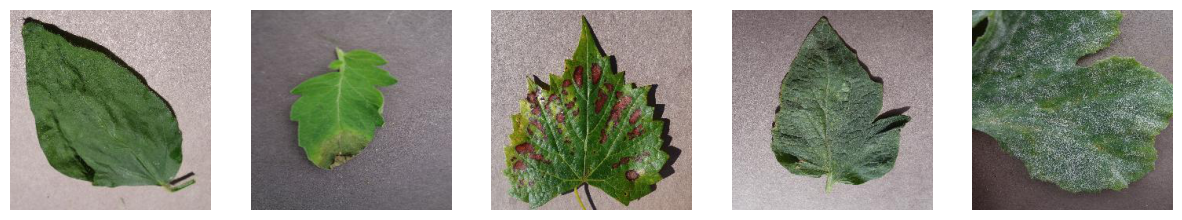

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

train_df = pd.read_csv('train.csv')

# Sélection d'un échantillon de chemins d'images
sample_images = train_df['Path'].sample(n=5).tolist()


plt.figure(figsize=(15, 10))
for i, img_path in enumerate(sample_images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import torch
from torchvision import transforms
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Charger les données
df = pd.read_csv('train.csv')

# Transformer pour prétraiter les images
transform = transforms.Compose([
    transforms.Resize((128, 128)), # Redimensionner l'image
    transforms.ToTensor(),       # Convertir en tensor PyTorch
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalisation
])

# Initialiser la liste pour stocker les images transformées
images = []

# Charger chaque image et appliquer les transformations
for img_path in df['Path']:
    img = Image.open(img_path).convert('RGB')  # Convertir en RGB si nécessaire
    img = transform(img)
    images.append(img)

# Convertir en tensor PyTorch
images = torch.stack(images)

# Encodage des labels
labels = df['Disease (target)'].values
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoded = to_categorical(integer_encoded) # Utilisation de to_categorical de Keras est OK ici

# Conversion des étiquettes en tensor PyTorch
onehot_encoded = torch.tensor(onehot_encoded).float()


In [ ]:
# Afficher quelques labels encodés et leurs représentations one-hot
print("Exemple de labels et leur encodage one-hot:")
for i in range(5):
    print(f"Label original: {labels[i]}, Label encodé: {integer_encoded[i]}, One-hot: {onehot_encoded[i]}")

Exemple de labels et leur encodage one-hot:
Label original: apple___apple_scab, Label encodé: 0, One-hot: tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.])
Label original: apple___apple_scab, Label encodé: 0, One-hot: tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.])
Label original: apple___apple_scab, Label encodé: 0, One-hot: tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.])
Label original: apple___apple_scab, Label encodé: 0, One-hot: tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

In [ ]:
import pandas as pd

# Charger le fichier CSV
test_df = pd.read_csv('test.csv')

# Afficher les premières lignes pour voir l'en-tête
print(test_df.head())


                                     Id  \
0  e3cf77fc-db4e-4475-bc64-7d8d1b3b1bea   
1  9f93ce59-518f-4876-b0fa-9d8586b1f296   
2  339378ca-594b-44ef-99e9-f006032f22da   
3  d003f849-7e9b-4279-b762-20898d37c0e8   
4  acbee275-4053-4c5b-9bac-49d98fbea2e7   

                                            Path  
0  test/e3cf77fc-db4e-4475-bc64-7d8d1b3b1bea.jpg  
1  test/9f93ce59-518f-4876-b0fa-9d8586b1f296.jpg  
2  test/339378ca-594b-44ef-99e9-f006032f22da.jpg  
3  test/d003f849-7e9b-4279-b762-20898d37c0e8.jpg  
4  test/acbee275-4053-4c5b-9bac-49d98fbea2e7.jpg  


In [ ]:
import os
import numpy as np
from PIL import Image
import torch
from torchvision import transforms

# Chemin de base pour les images de test
base_path = 'C:\\Users\\MFE\\OneDrive\\Unamur\\unamur-infom232-2023-2024\\test\\unknown'

# Transformer pour prétraiter les images de test
test_transform = transforms.Compose([
    transforms.Resize((128, 128)), # Redimensionner l'image
    transforms.ToTensor(),       # Convertir en tensor PyTorch
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalisation
])

test_images = []

# Charger chaque image de test et appliquer les transformations
for img_path in test_df['Path']:
    full_path = os.path.join(base_path, img_path.split('/')[-1])

    if os.path.exists(full_path):
        img = Image.open(full_path).convert('RGB')
        img = test_transform(img)
        test_images.append(img)
    else:
        print(f"Le fichier n'existe pas : {full_path}")

# Convertir en tensor PyTorch
X_test = torch.stack(test_images)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Première couche convolutive : 3 canaux d'entrée, 32 canaux de sortie, kernel de 3x3
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        # Deuxième couche convolutive : 32 canaux d'entrée, 64 canaux de sortie, kernel de 3x3
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # Troisième couche convolutive : 64 canaux d'entrée, 128 canaux de sortie, kernel de 3x3
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        # Couche de pooling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # Taille aplatie : taille de la feature map à la sortie de la dernière couche convolutive
        # Après 3 couches de pooling, la taille de l'image est réduite de 128x128 à 16x16
        flattened_size = 128 * 16 * 16
        # Première couche linéaire après aplatissement
        self.fc1 = nn.Linear(flattened_size, 512)
        # Deuxième couche linéaire pour la classification, 39 classes
        self.fc2 = nn.Linear(512, 39)

    def forward(self, x):
        # Appliquer la convolution suivie de l'activation ReLU et du pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # Aplatir la sortie pour la couche linéaire
        x = x.view(-1, 128 * 16 * 16)
        # Appliquer la première couche linéaire et ReLU
        x = F.relu(self.fc1(x))
        # Appliquer la deuxième couche linéaire pour obtenir les scores de classification
        x = self.fc2(x)
        return x


In [ ]:
# Supposons que X et y sont vos données d'images et étiquettes
X = images # Vos données d'image sous forme de tenseurs
y = onehot_encoded # Vos étiquettes sous forme de tenseurs

# Séparation en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer des datasets et des dataloaders
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Boucle d'entraînement
for epoch in range(10):  # Nombre d'époques
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Ici, vous pouvez ajouter du code pour valider sur l'ensemble de validation


In [ ]:
# Mettre le modèle en mode évaluation
model.eval()

# Initialiser les variables pour suivre la perte et la précision
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for data in val_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # Convertir les étiquettes one-hot en indices de classe
        labels = torch.argmax(labels, dim=1)

        # Faire des prédictions
        outputs = model(images)

        # Calculer la perte
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Convertir les scores de sortie en prédictions de classe
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


# Calculer la perte moyenne et la précision
test_loss = test_loss / len(val_loader.dataset)
test_accuracy = correct / total

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Test Loss: 0.0032, Test Accuracy: 0.9139


In [ ]:
torch.save(model.state_dict(), "mon_modele.pth")


In [ ]:
# Supposons que X_test est un DataLoader contenant vos données de test
predictions = []
for inputs in X_test:
    inputs = inputs.to(device)  # Envoyer les données au même périphérique que le modèle
    with torch.no_grad():
        outputs = model(inputs)
        predictions.append(outputs.cpu().numpy())

# Concaténer toutes les prédictions
predictions = np.concatenate(predictions, axis=0)
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_classes)
for i in range(10):  # Exemple : afficher les prédictions pour les 10 premières images
    print(f"Image {i}: Classe prédite - {predicted_labels[i]}")


Image 0: Classe prédite - apple___apple_scab
Image 1: Classe prédite - blueberry___healthy
Image 2: Classe prédite - apple___apple_scab
Image 3: Classe prédite - apple___apple_scab
Image 4: Classe prédite - apple___apple_scab
Image 5: Classe prédite - apple___apple_scab
Image 6: Classe prédite - apple___apple_scab
Image 7: Classe prédite - apple___apple_scab
Image 8: Classe prédite - apple___healthy
Image 9: Classe prédite - apple___apple_scab


In [ ]:
# Assurez-vous que la classe SimpleCNN est définie comme dans votre script d'entraînement
model = SimpleCNN()
model.load_state_dict(torch.load("mon_modele.pth"))
model.eval()


SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=39, bias=True)
)

In [ ]:
# Créer un DataFrame pour les résultats
results_df = pd.DataFrame({'Id': test_df['Id'], 'Disease (target)': predicted_labels})

# Enregistrer les résultats dans un fichier CSV
results_df.to_csv('submission.csv', index=False)


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Créer des étiquettes fictives pour les données de test
fake_labels = torch.zeros(X_test.size(0), dtype=torch.long)

# Créer un TensorDataset avec les images de test et les étiquettes fictives
test_dataset = TensorDataset(X_test, fake_labels)

# Créer un DataLoader pour les données de test
test_batches = DataLoader(test_dataset, batch_size=128, shuffle=False)


In [ ]:
import numpy as np
import torch

n_epochs = 10

train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(n_epochs):
    # Entraînement
    model.train()
    train_correct = 0
    train_total = 0
    train_losses = []

    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)
        targets = torch.argmax(targets, dim=1)  # Si one-hot encoded

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        _, predictions = torch.max(outputs, 1)
        train_correct += (predictions == targets).sum().item()
        train_total += targets.size(0)
        train_losses.append(loss.item())

    train_accuracy.append(train_correct / train_total)
    train_loss.append(np.mean(train_losses))

    # Évaluation
    model.eval()
    test_correct = 0
    test_total = 0
    test_losses = []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            labels = torch.argmax(labels, dim=1)  # Si one-hot encoded

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_losses.append(loss.item())

            _, predictions = torch.max(outputs, 1)
            test_correct += (predictions == labels).sum().item()
            test_total += labels.size(0)

    test_loss_epoch = np.sum(test_losses) / len(val_loader.dataset)
    test_loss.append(test_loss_epoch)
    test_accuracy.append(test_correct / test_total)

    print(f'Epoch {epoch} - Train Acc: {train_accuracy[-1]:.4f}, Loss: {train_loss[-1]:.4f}, Test Acc: {test_accuracy[-1]:.4f}, Loss: {test_loss[-1]:.4f}')

print('Training completed.')


Epoch 0 - Train Acc: 0.9765, Loss: 0.0974, Test Acc: 0.9581, Loss: 0.0012
Epoch 1 - Train Acc: 0.9765, Loss: 0.0975, Test Acc: 0.9581, Loss: 0.0012
Epoch 2 - Train Acc: 0.9765, Loss: 0.0975, Test Acc: 0.9581, Loss: 0.0012
Epoch 3 - Train Acc: 0.9765, Loss: 0.0975, Test Acc: 0.9581, Loss: 0.0012
Epoch 4 - Train Acc: 0.9765, Loss: 0.0975, Test Acc: 0.9581, Loss: 0.0012
Epoch 5 - Train Acc: 0.9765, Loss: 0.0974, Test Acc: 0.9581, Loss: 0.0012
Epoch 6 - Train Acc: 0.9765, Loss: 0.0975, Test Acc: 0.9581, Loss: 0.0012
Epoch 7 - Train Acc: 0.9765, Loss: 0.0975, Test Acc: 0.9581, Loss: 0.0012
Epoch 8 - Train Acc: 0.9765, Loss: 0.0974, Test Acc: 0.9581, Loss: 0.0012
Epoch 9 - Train Acc: 0.9765, Loss: 0.0975, Test Acc: 0.9581, Loss: 0.0012
Training completed.


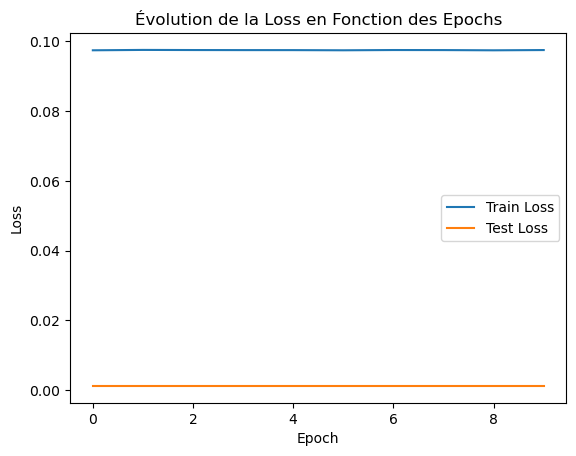

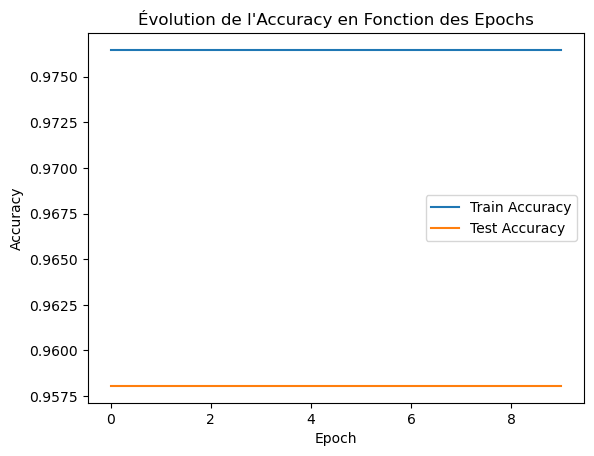

In [ ]:
import matplotlib.pyplot as plt

# Tracer la perte (loss)
plt.figure()
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title("Évolution de la Loss en Fonction des Epochs")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tracer la précision (accuracy)
plt.figure()
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title("Évolution de l'Accuracy en Fonction des Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import KFold
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Initialisation des paramètres
n_splits = 10
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
# Supposons que vous ayez déjà vos données sous forme de tenseurs PyTorch X et y
# X = images, y = onehot_encoded

# Stocker les résultats
fold_results = []

for fold, (train_ids, val_ids) in enumerate(kfold.split(X)):
    print(f'FOLD {fold}')
    print('--------------------------------')

    # Créer des datasets et des DataLoaders pour ce pli
    train_dataset = TensorDataset(X[train_ids], y[train_ids])
    val_dataset = TensorDataset(X[val_ids], y[val_ids])
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

    # Initialiser le modèle pour ce pli
    model = SimpleCNN()
    model.to(device)  # Assurez-vous que device est défini (cpu ou cuda)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Réinitialiser les métriques pour ce pli
    train_accuracy = []
    train_loss = []
    test_accuracy = []
    test_loss = []

    for epoch in range(n_epochs):
        fold_results.append({
        "fold": fold,
        "train_loss": np.mean(train_loss),
        "val_loss": np.mean(test_loss),
        "train_accuracy": np.mean(train_accuracy),
        "val_accuracy": np.mean(test_accuracy)
    })

# Calculer la moyenne des résultats sur tous les plis
average_results = {
    "train_loss": np.mean([result['train_loss'] for result in fold_results]),
    "val_loss": np.mean([result['val_loss'] for result in fold_results]),
    "train_accuracy": np.mean([result['train_accuracy'] for result in fold_results]),
    "val_accuracy": np.mean([result['val_accuracy'] for result in fold_results])
}
print(average_results)
